## Setup

In [672]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [721]:
def remove_ouliers(data,column,remove=False):
    """
        We should pass True to remove only if we are looking in target variable
    """
    q3=data[column].quantile(.75)
    q1=data[column].quantile(.25)
    iqr=q3-q1
    #iqr=iqr+0.5*iqr
    upper = q3 +1.5*iqr
    lower = q1 - 1.5*iqr
    upper_pre=upper
    lower_pre=lower
    while True:
        print("(lower,upper) : ",(lower,upper))
        if remove:
            index_column = data[ data[column] >= upper].index
            data.drop(index_column , inplace=True)
        else:
            data[column]=np.where(data[column]>upper,np.nan,data[column])
        q3=data[column].quantile(.75)
        q1=data[column].quantile(.25)
        iqr=q3-q1
        #print("(lower,upper,IQR) :",(q1,q3,iqr))
        #iqr=iqr+0.5*iqr
        upper = q3 +1.5*iqr
        lower = q1 - 1.5*iqr
        if upper == upper_pre and lower==lower_pre:
            break
        else:
            upper_pre=upper
            lower_pre=lower

    return data

## Data

In [674]:
train_data=pd.read_csv("../data/Train.csv")
test_data=pd.read_csv("../data/Test.csv")
print(train_data.shape)

(8523, 12)


In [675]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [676]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [677]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [678]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [679]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [680]:
print("shape of train data is ",train_data.shape)
print("shape of test data is ",test_data.shape)

shape of train data is  (8523, 12)
shape of test data is  (5681, 11)


In [681]:
train_data.isnull().sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Exploratory Data Analysis

In [682]:
columns_name=train_data.columns.to_list()
columns_name

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Count'>

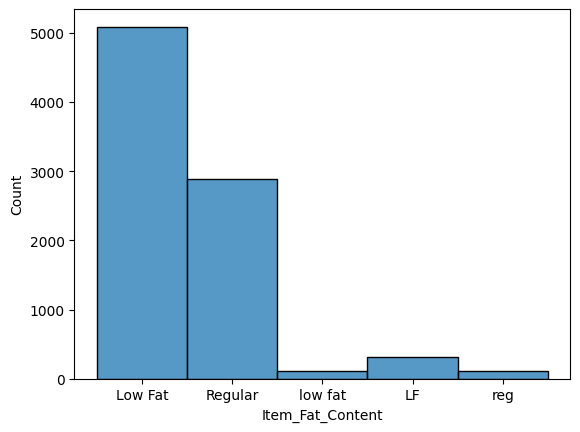

In [683]:

sns.histplot(data=train_data,x="Item_Fat_Content")


<p> 
 So as we see, we have problems with names. "Regular" is writing also as <b>reg</b> and the same for "LF" and Low Fat and low fat, are all equals. We need to fixe this problem First
</p>

<AxesSubplot: xlabel='Item_Fat_Content', ylabel='Count'>

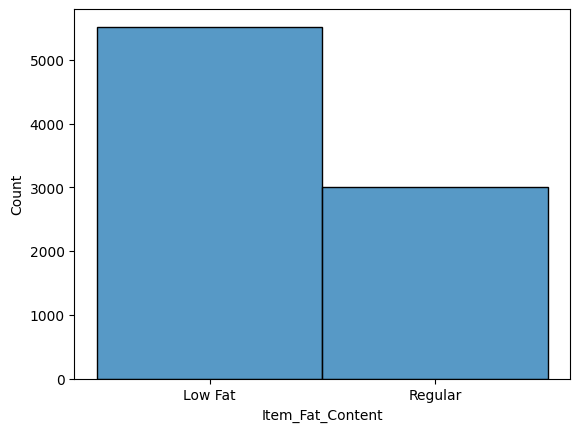

In [684]:
train_data.loc[ train_data["Item_Fat_Content"] == "low fat" , "Item_Fat_Content"] = "Low Fat"
train_data.loc[ train_data["Item_Fat_Content"] == "LF" , "Item_Fat_Content"] = "Low Fat"
train_data.loc[ train_data["Item_Fat_Content"] == "reg" , "Item_Fat_Content"] = "Regular"
sns.histplot(data=train_data,x="Item_Fat_Content")


In [685]:
columns_name

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

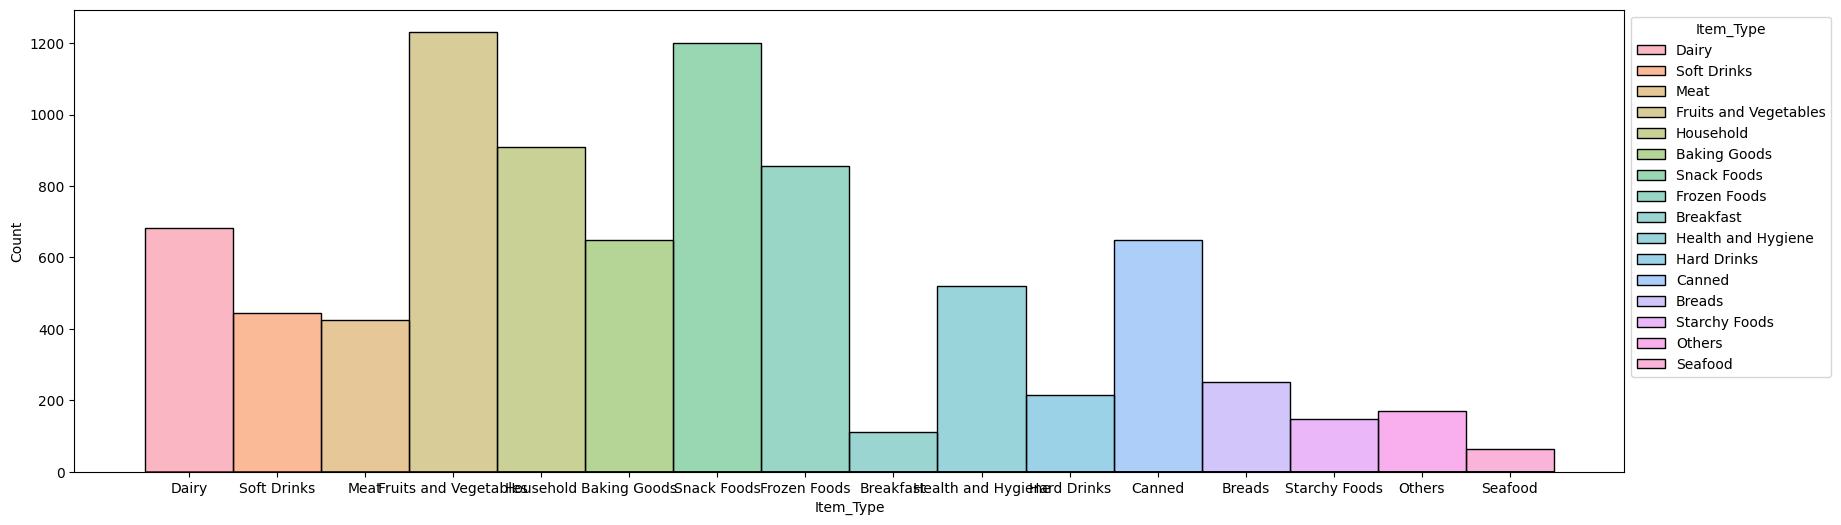

In [686]:
plt.figure(figsize=(20,6))
ax=sns.histplot(data=train_data,x="Item_Type",kde=True,hue="Item_Type")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


We have the main problem here is the balance data.

Seafood as category is too small for oour model. We should remove it or add more data for this category

As we can see in the next output cell:

In [687]:
print(train_data["Item_Type"].unique())
print("-"*40)
print(train_data["Item_Type"].value_counts())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
----------------------------------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


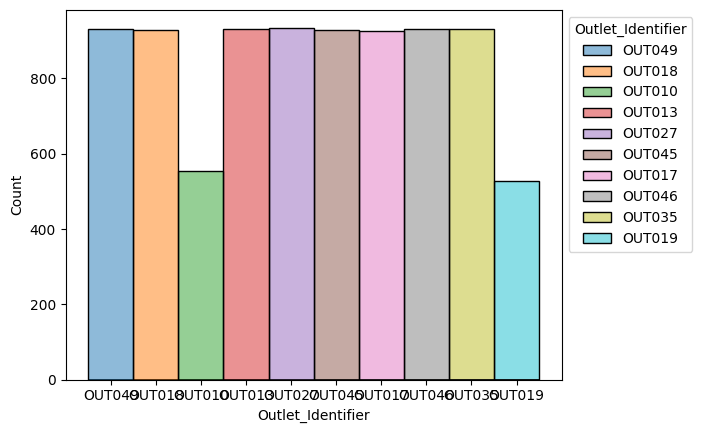

In [689]:
#plt.figure(figsize=(6,3))
ax=sns.histplot(data=train_data,x="Outlet_Identifier",kde=True,hue="Outlet_Identifier")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

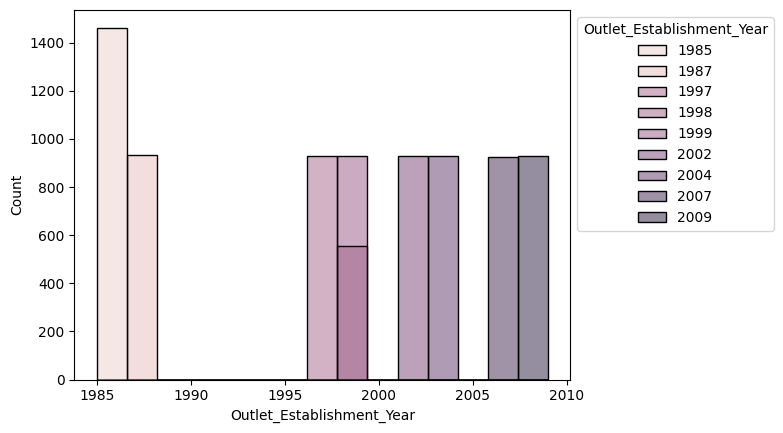

In [690]:
ax=sns.histplot(data=train_data,x="Outlet_Establishment_Year",kde=True,hue="Outlet_Establishment_Year")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


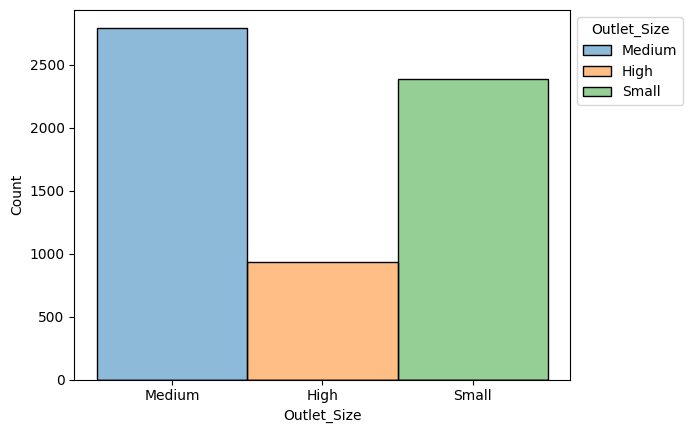

In [699]:

ax=sns.histplot(data=train_data,x="Outlet_Size",hue="Outlet_Size")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(train_data.Outlet_Size.value_counts())

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


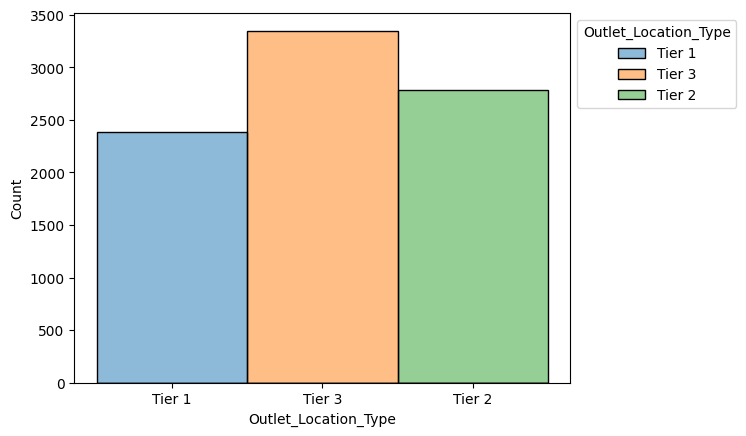

In [701]:

ax=sns.histplot(data=train_data,x="Outlet_Location_Type",hue="Outlet_Location_Type")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(train_data.Outlet_Location_Type.value_counts())

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


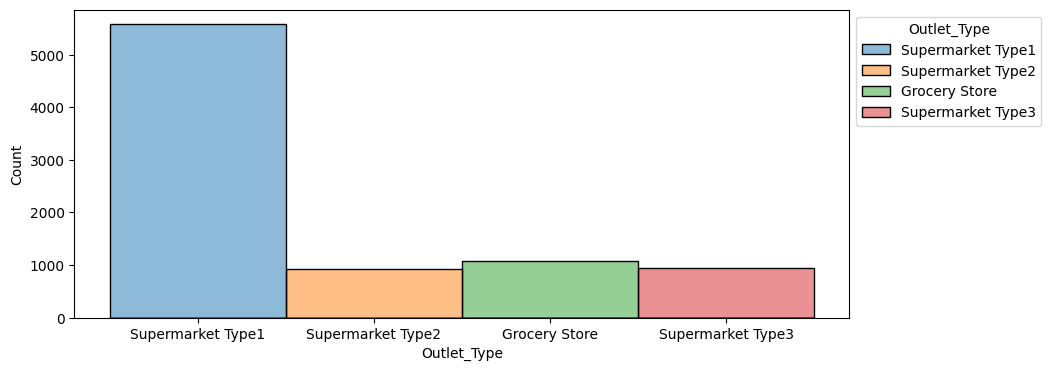

In [703]:
plt.figure(figsize=(10,4))
ax=sns.histplot(data=train_data,x="Outlet_Type",hue="Outlet_Type")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
print(train_data.Outlet_Type.value_counts())

Here we have also problem of balance data

### Outliers

(lower,upper,IQR) : (806.4502500000001, 2972.1312, 2165.68095)
(lower,upper) :  (-2442.071175, 6220.652625)


'\n(lower,upper,IQR) : (806.4502500000001, 2972.1312, 2165.68095)\n(lower,upper) :  (-2442.071175, 6220.652625)\n'

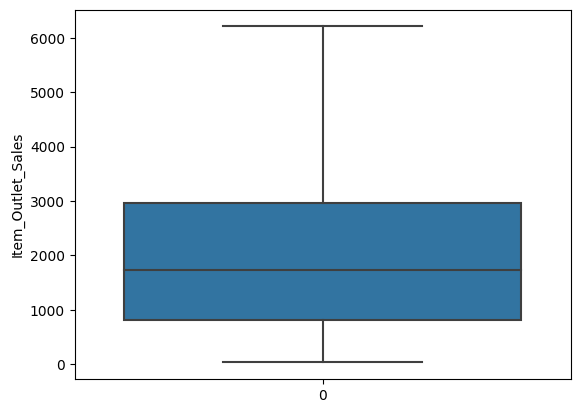

In [712]:
# let'si first check for target variable
sns.boxplot(train_data["Item_Outlet_Sales"])
plt.ylabel("Item_Outlet_Sales")
train_data=remove_ouliers(train_data,"Item_Outlet_Sales",True)

In [713]:
train_data_num=train_data.select_dtypes("float64")
train_data_cat=train_data.select_dtypes("object")
print(train_data_num.head())
print("-----------"*10)
print(train_data_cat.head())

   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0         9.30         0.016047  249.8092          3735.1380
1         5.92         0.019278   48.2692           443.4228
2        17.50         0.016760  141.6180          2097.2700
3        19.20         0.000000  182.0950           732.3800
4         8.93         0.000000   53.8614           994.7052
--------------------------------------------------------------------------------------------------------------
  Item_Identifier Item_Fat_Content              Item_Type Outlet_Identifier  \
0           FDA15          Low Fat                  Dairy            OUT049   
1           DRC01          Regular            Soft Drinks            OUT018   
2           FDN15          Low Fat                   Meat            OUT049   
3           FDX07          Regular  Fruits and Vegetables            OUT010   
4           NCD19          Low Fat              Household            OUT013   

  Outlet_Size Outlet_Location_Type        Outlet

(lower,upper) :  (-3.34375, 28.966250000000002)


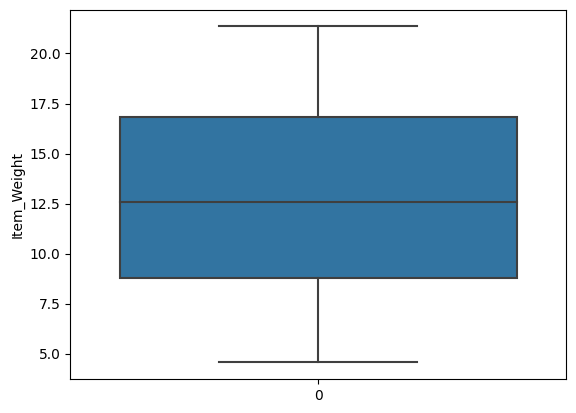

(lower,upper) :  (-0.07548733524999998, 0.19789034074999998)
(lower,upper) :  (-0.07235822725, 0.19211285875)
(lower,upper) :  (-0.07209268699999999, 0.191594345)
(lower,upper) :  (-0.072086542, 0.191583428)


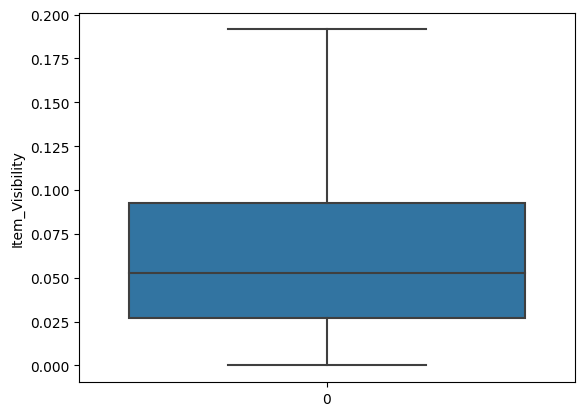

(lower,upper) :  (-42.675049999999985, 318.38334999999995)


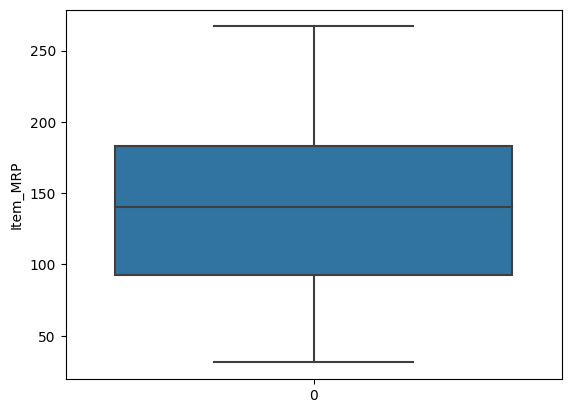

(lower,upper) :  (-2442.071175, 6220.652625)


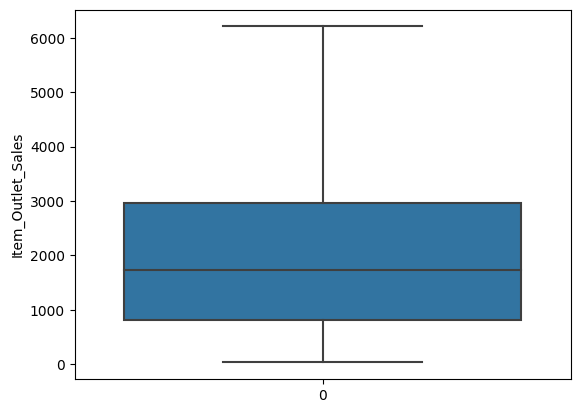

In [724]:
for col in train_data_num:
    if col=="Item_Outlet_Sales":
        train_data_num=remove_ouliers(train_data_num,col,remove=True)
    else:
        train_data_num=remove_ouliers(train_data_num,col)
    sns.boxplot(train_data_num[col])
    plt.ylabel(str(col))
    plt.show()


In [726]:
train_data_num.isnull().sum()

Item_Weight          1347
Item_Visibility       154
Item_MRP                0
Item_Outlet_Sales       0
dtype: int64

### Missing Values

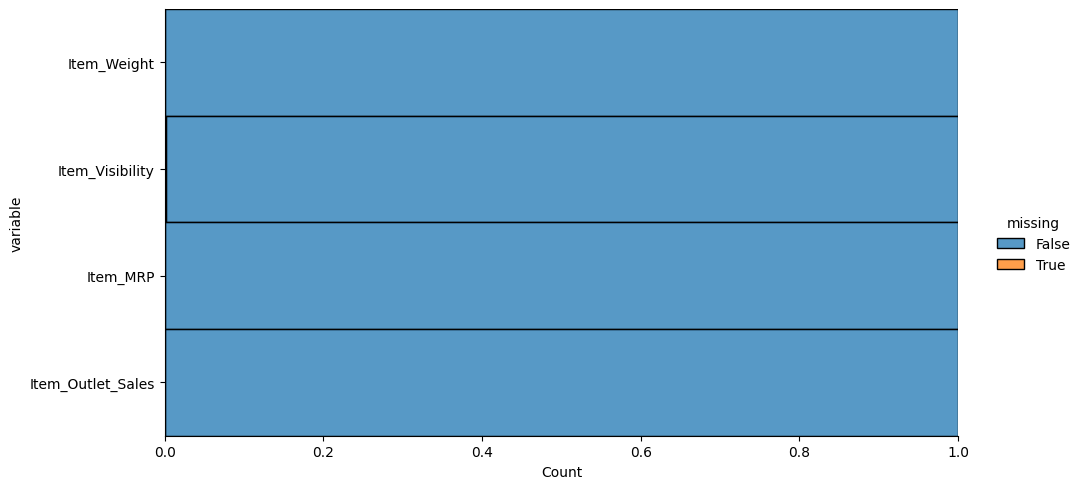

In [768]:
sns.displot(
    data=train_data_num.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

#### Fill Nan Values with Median

In [769]:
train_data_num["Item_Visibility"]=train_data_num["Item_Visibility"].fillna(train_data_num["Item_Visibility"].median())
train_data_num["Item_Weight"]=train_data_num["Item_Weight"].fillna(train_data_num["Item_Weight"].median())

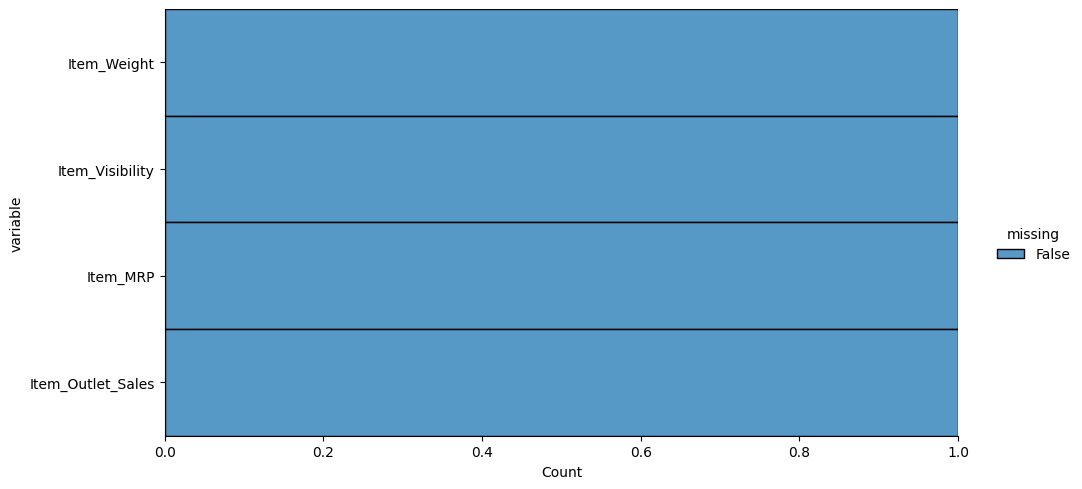

In [770]:
sns.displot(
    data=train_data_num.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

(lower,upper) :  (-0.9000000000000004, 26.300000000000004)


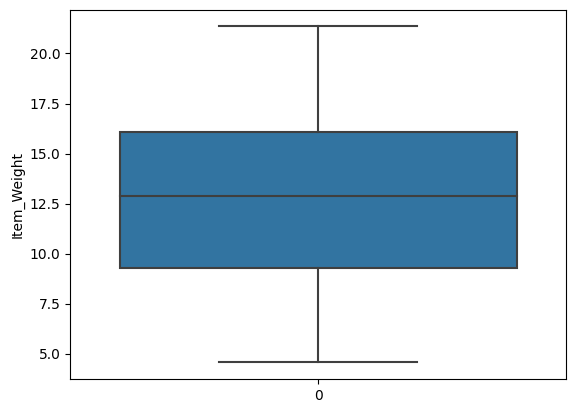

(lower,upper) :  (-0.06876051175, 0.18667896825000002)
(lower,upper) :  (-0.068730138, 0.18662575799999997)


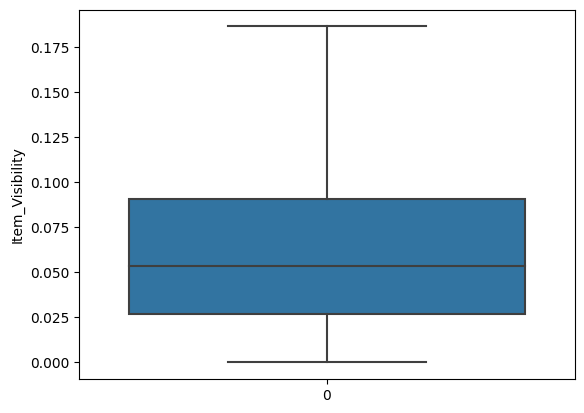

(lower,upper) :  (-42.675049999999985, 318.38334999999995)


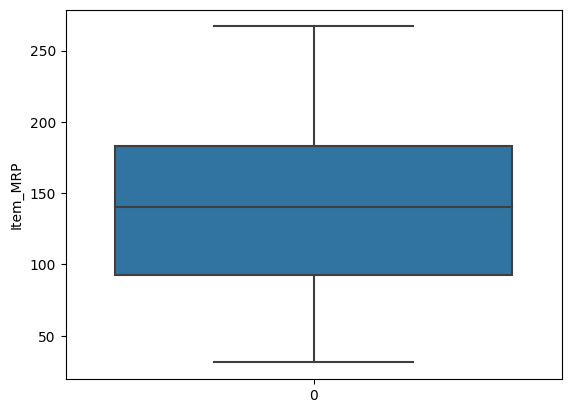

(lower,upper) :  (-2442.071175, 6220.652625)


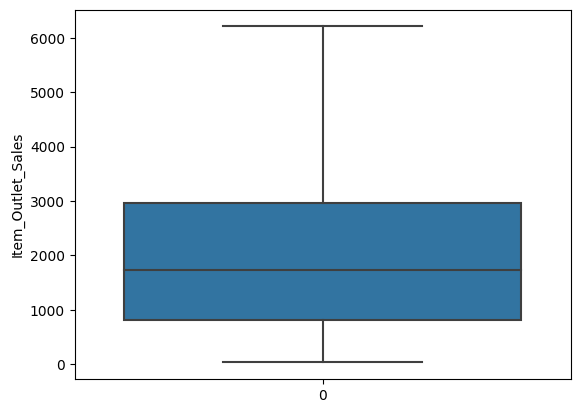

In [771]:
for col in train_data_num:
    if col=="Item_Outlet_Sales":
        train_data_num=remove_ouliers(train_data_num,col,remove=True)
    else:
        train_data_num=remove_ouliers(train_data_num,col)
    sns.boxplot(train_data_num[col])
    plt.ylabel(str(col))
    plt.show()

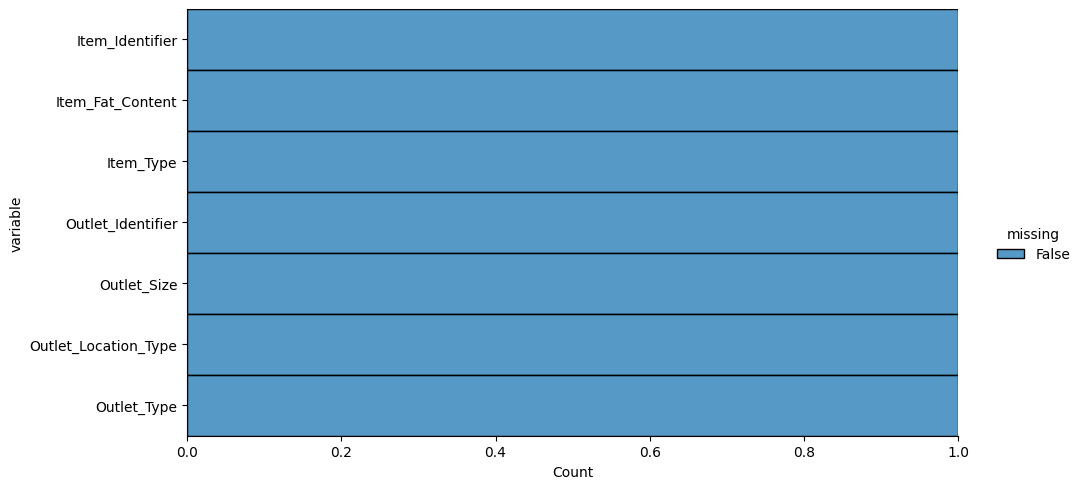

In [772]:
sns.displot(
    data=train_data_cat.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

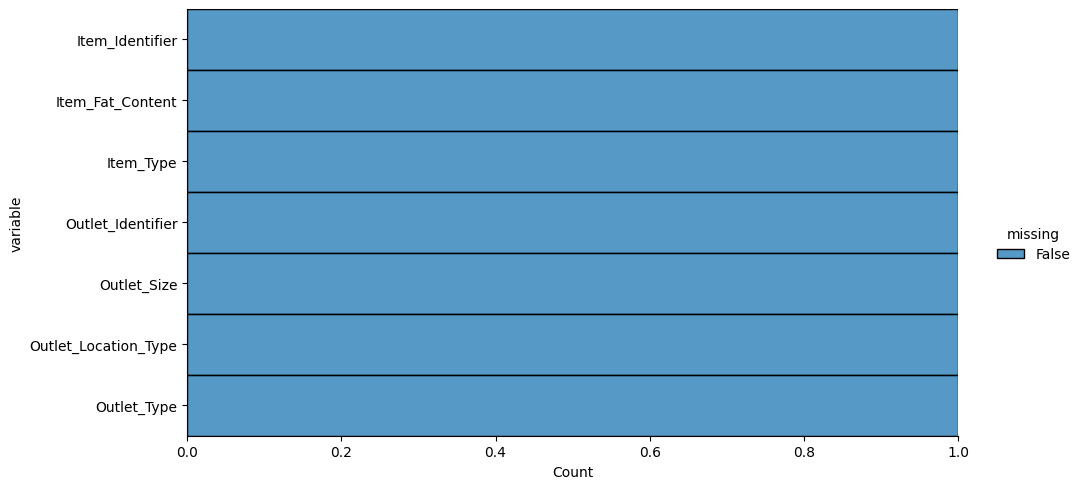

In [773]:
train_data_cat = train_data_cat.fillna(train_data_cat.mode().iloc[0])
sns.displot(
    data=train_data_cat.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

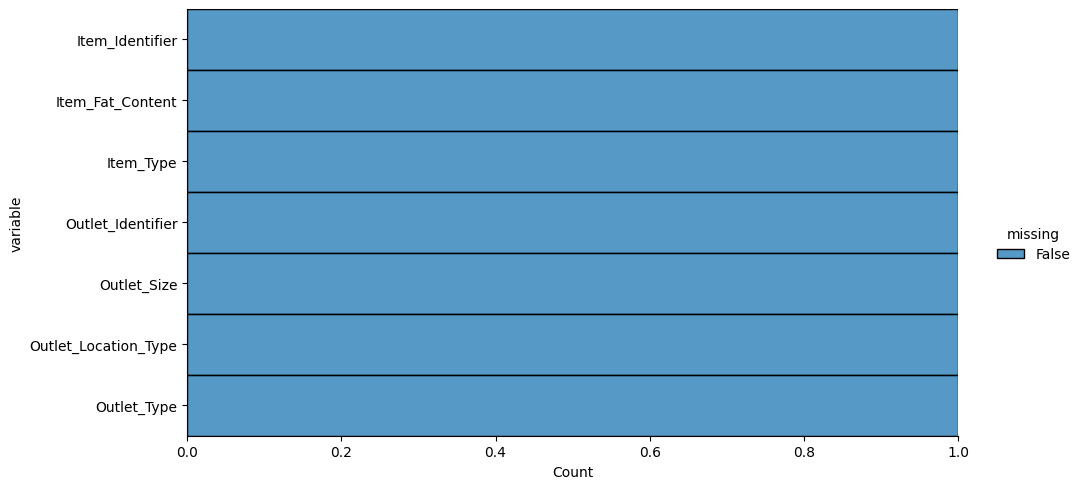

In [803]:
data=pd.concat([train_data_cat,train_data_num],axis=1,join="outer")
sns.displot(
    data=train_data_cat.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

C:\Users\Elkharroubi\AppData\Local\Temp\ipykernel_9940\2416425088.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True)


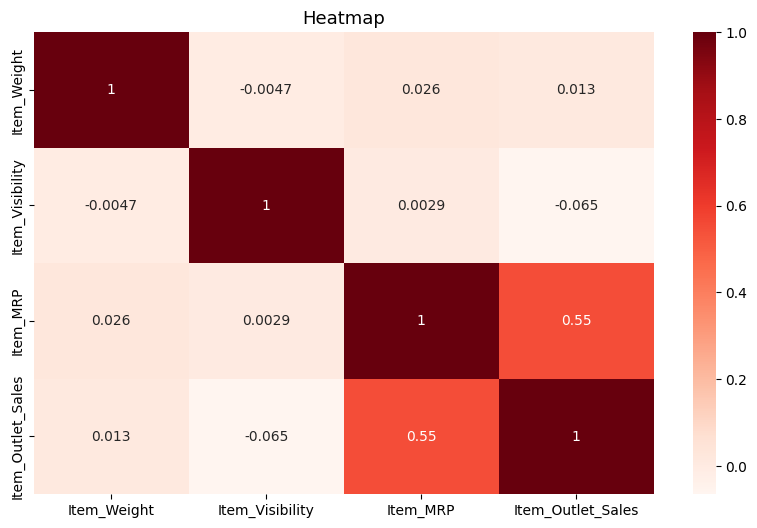

In [807]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap',
         fontsize=13)
plt.show()

### Categorical encoding

In [760]:
train_data_cat.shape

(8290, 7)

In [761]:
train_data_cat.columns.to_list()[1:]

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

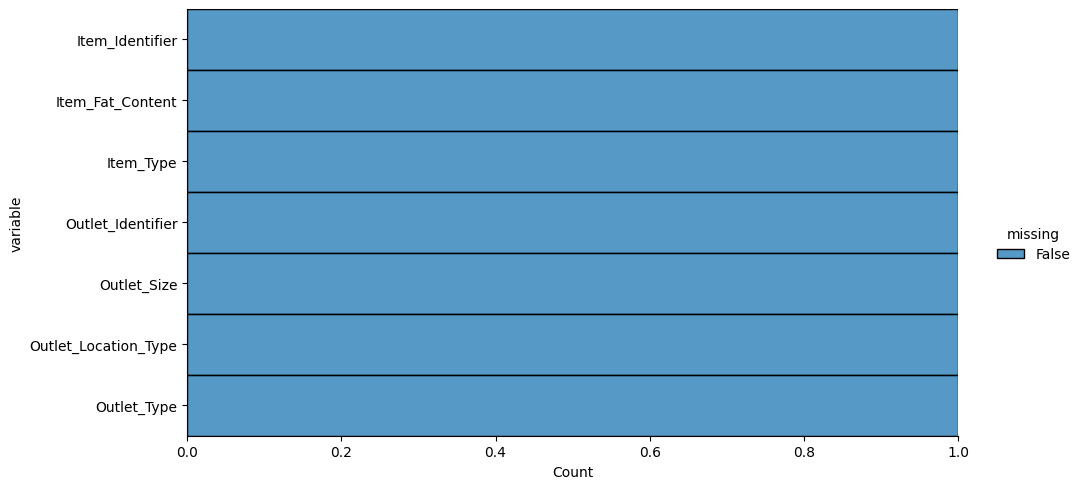

In [801]:
sns.displot(
    data=train_data_cat.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

In [808]:
# we must remove first colum as product identifier
train_data_cata_encoded=pd.get_dummies(train_data_cat.iloc[:,1:], columns=train_data_cat.columns.to_list()[1:])
train_data_cata_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


### Fusion of data

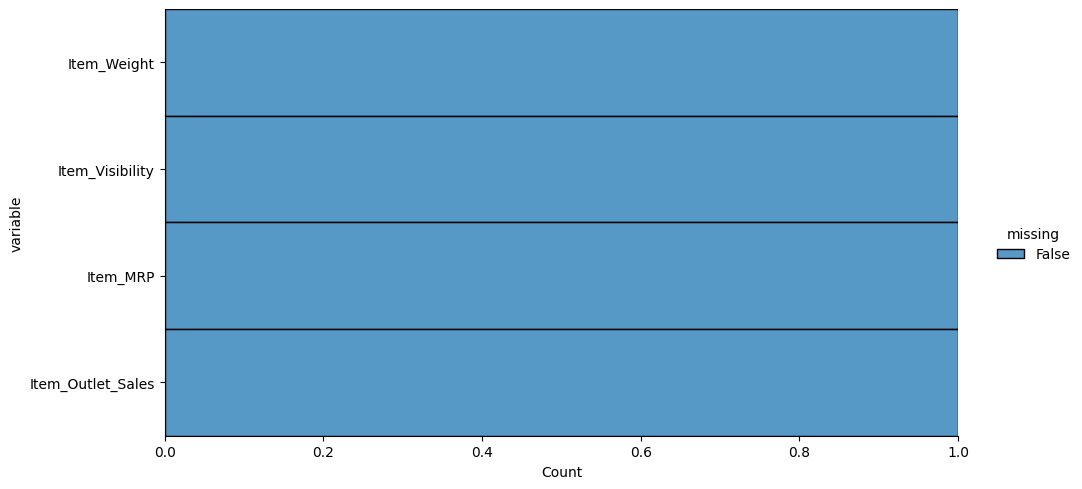

In [809]:
sns.displot(
    data=train_data_num.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

In [810]:
train_data_num["Item_Visibility"]=train_data_num["Item_Visibility"].fillna(train_data_num["Item_Visibility"].median())

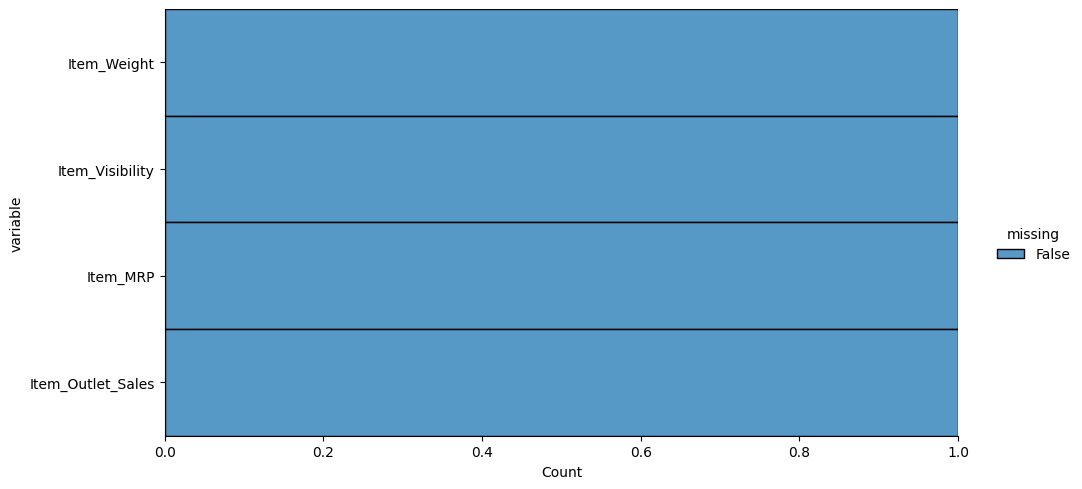

In [811]:
sns.displot(
    data=train_data_num.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

In [812]:
data=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")

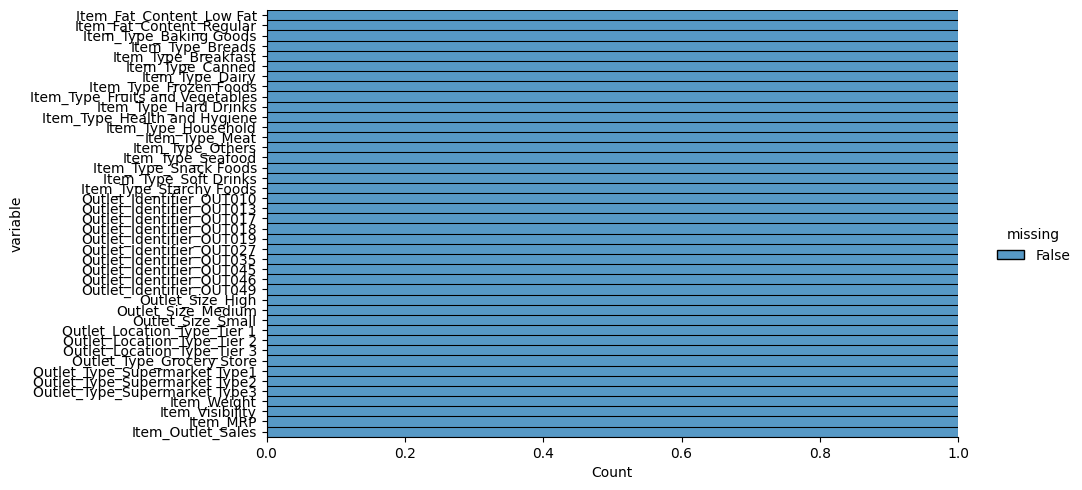

In [813]:
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

In [814]:
data.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,9.30,0.016047,249.8092,3735.1380
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,5.92,0.019278,48.2692,443.4228
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,17.50,0.016760,141.6180,2097.2700
3,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,19.20,0.000000,182.0950,732.3800
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,8.93,0.000000,53.8614,994.7052


In [815]:
data.shape

(8290, 42)

# Buid Models

In [816]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [817]:
def evaluate(y_test,y_predict):
    print("MAE ",metrics.mean_absolute_error(y_predict,y_test))
    print("MSE",metrics.mean_squared_error(y_predict,y_test))
    print("RMSE ",np.sqrt(metrics.mean_squared_error(y_predict,y_test)))

In [818]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:data.shape[1]-1], data["Item_Outlet_Sales"], test_size=0.3, random_state=200)

### 1. Linear Regression

In [819]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.5564336800876047

In [820]:
y_predict=reg.predict(X_test)
evaluate(y_test,y_predict)

MAE  747.9822804236809
MSE 934749.1843395855
RMSE  966.8242779014114


### regularized linear regression

#### Ridge regression

In [828]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
y_predict=ridge.predict(X_test)
evaluate(y_test,y_predict)


MAE  747.9579495561264
MSE 934716.9693353731
RMSE  966.8076175410355


#### Lasso regression

In [831]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.4)
lasso.fit(X_train, y_train)
y_predict=lasso.predict(X_test)
evaluate(y_test,y_predict)

MAE  747.5618652286469
MSE 933865.6478529634
RMSE  966.3672427462365


### RandomForest

In [832]:
from sklearn.ensemble import RandomForestRegressor

In [833]:
random_cl = RandomForestRegressor(n_estimators=100)
random_cl=random_cl.fit(X_train,y_train)
y_predict=random_cl.predict( X_test)
evaluate(y_predict,y_test)

MAE  708.7109786586248
MSE 953148.5431345038
RMSE  976.2932669718172


### xgboost

In [834]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [835]:
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror',n_estimators = 10, seed = 123)
# Fitting the model
xgb_r=xgb_r.fit(X_train, y_train)
 

In [836]:
# Predict the model
y_predict = xgb_r.predict(X_train)
evaluate(y_train,y_predict)

MAE  642.8937420076804
MSE 793599.4931713981
RMSE  890.8420135868076


In [837]:
# Predict the model
y_predict = xgb_r.predict(X_test)
evaluate(y_test,y_predict)

MAE  679.2620789756368
MSE 868526.0678856312
RMSE  931.9474598310954


In [838]:
poly = PolynomialFeatures(degree=2)
new_X=poly.fit_transform(X_train)

In [839]:
xgb_r=xgb_r.fit(new_X, y_train)
y_predict = xgb_r.predict(poly.fit_transform(X_test))
evaluate(y_test,y_predict)

MAE  687.3617760529755
MSE 891129.3540044611
RMSE  943.996479868681


In [522]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.001,0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          predictor=None, random_state=None, ...),
                   n_iter=25,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.001, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='neg_mean_squared_error', verbose=1)

In [523]:
evaluate(y_test,clf.predict(X_test))

MAE  586.4639658262855
MSE 641948.0380500441
RMSE  801.2165987110128
